# Mapas viales con OSMnx

## Mapas  usando información lineal de openstreet map 

In [1]:
#instalando OSMnx
!pip install OSMnx

In [3]:
#importando paquete y descargando redes de Bogotá
import osmnx as ox
Ciudad = ["Bogota, Colombia"]
Gr = ox.graph_from_place(Ciudad, retain_all=True, simplify = True, network_type='all')# descarga todas las redes y simplifica 

In [4]:
#creando lista de objetos y reordenando datos 
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gr.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)  

In [5]:
# Lista de colores
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#d5d5d5"
            linewidth = 0.35
        else:
            color = "#ededed"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

In [6]:
# enfocando o centrando mapa 
latitude = 4.6227043
longitude = -74.1260142



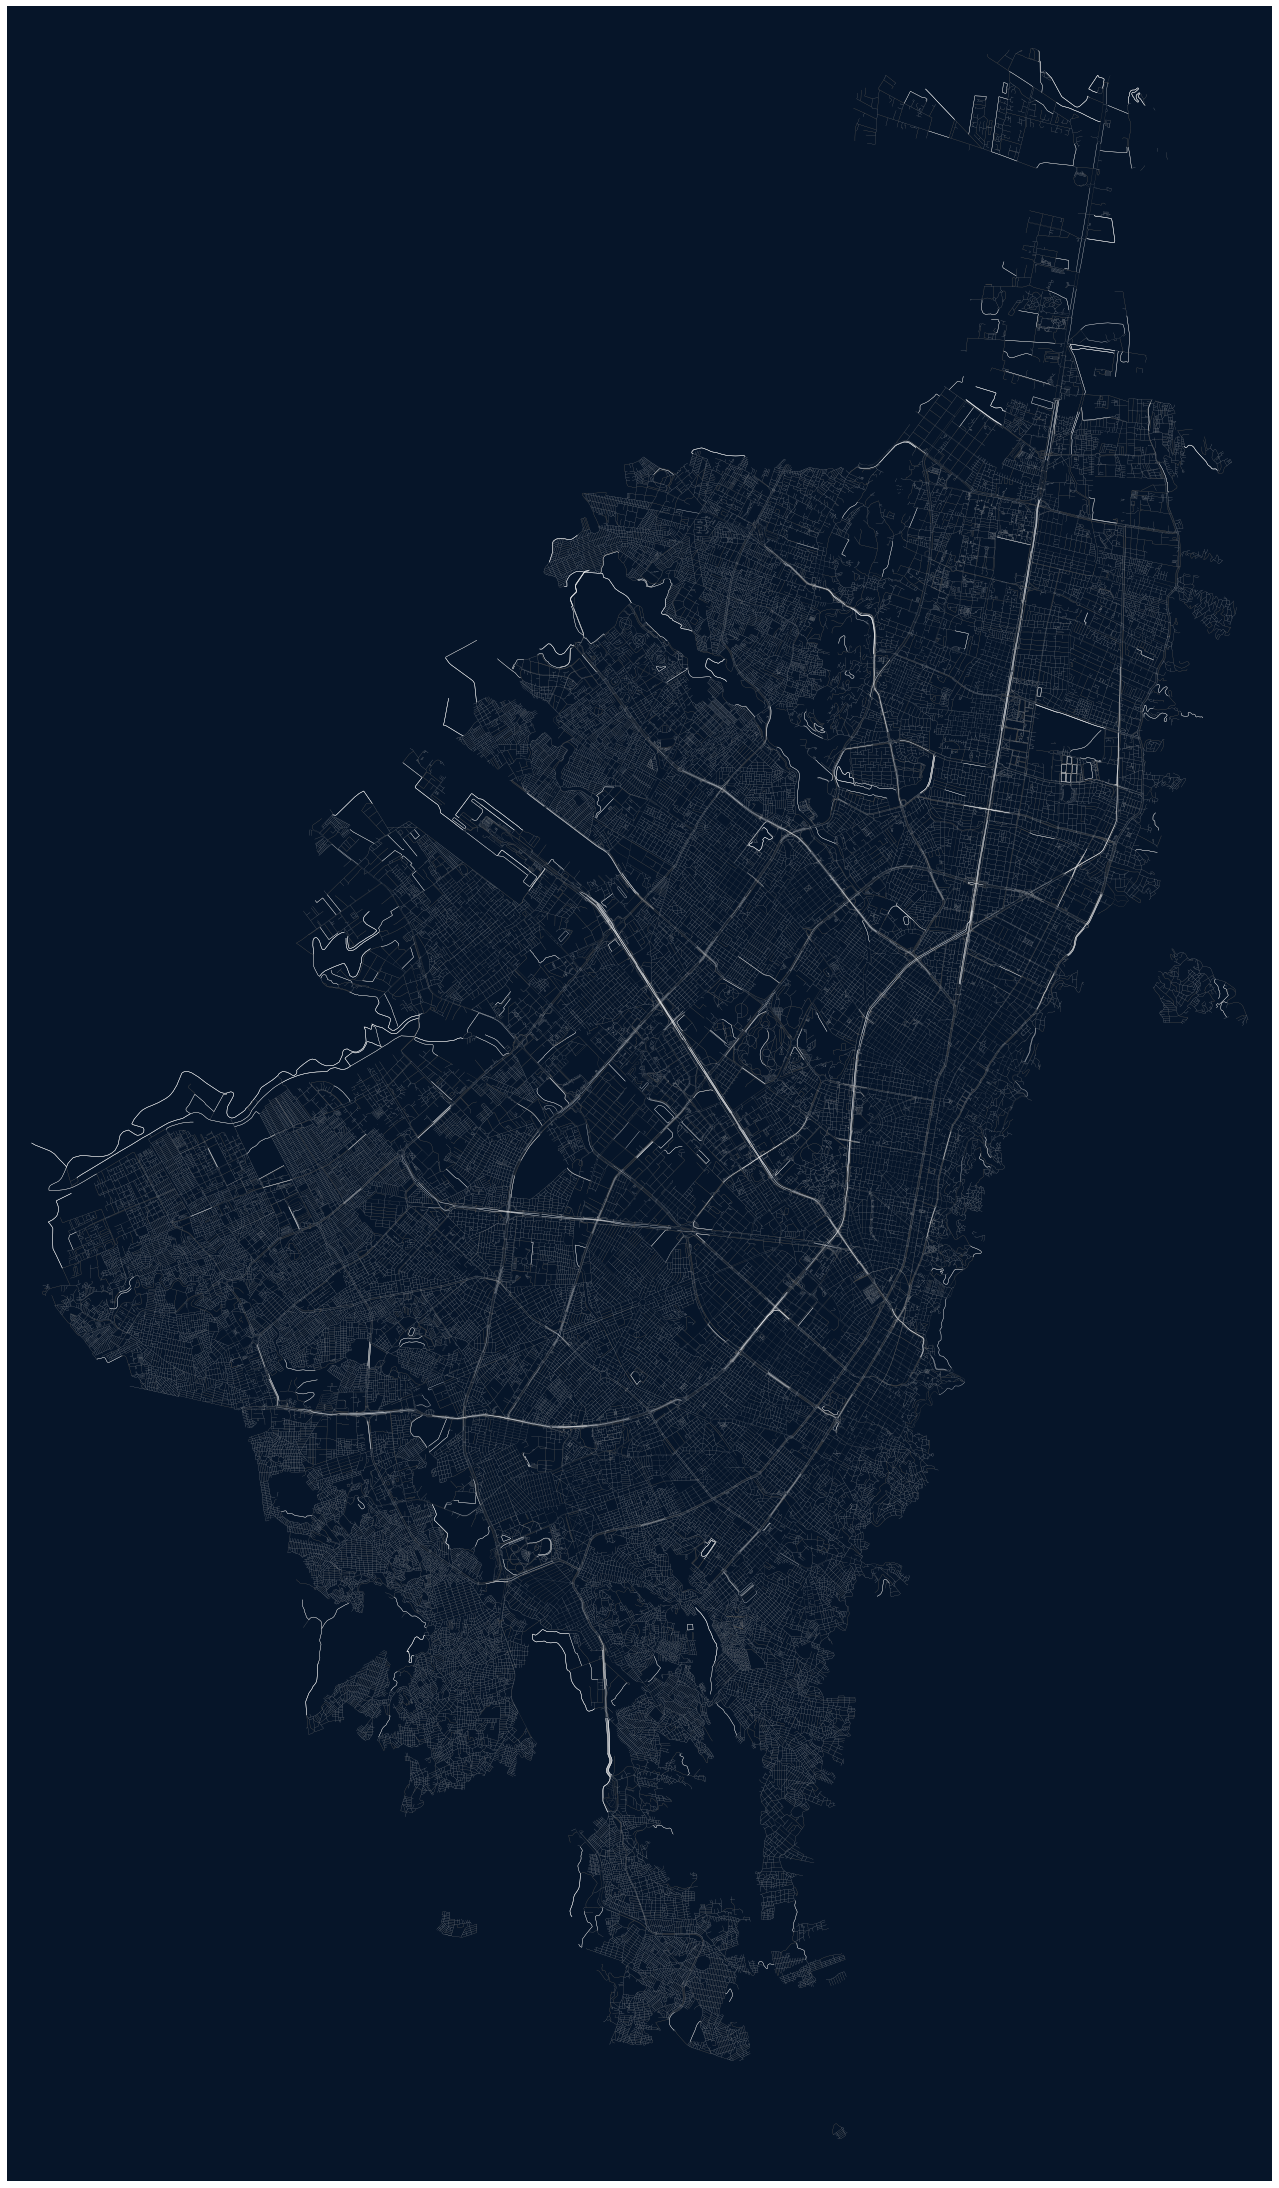

In [8]:
#configurando capa artisitica 
bgcolor = "#061529"

fig, ax = ox.plot_graph(Gr, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

In [9]:
#Guardando mapa
fig.tight_layout(pad=0)
fig.savefig("Mapa_viasBogota.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)

# Fuentes :
## https://towardsdatascience.com/creating-beautiful-maps-with-python-6e1aae54c55c 
## https://osmnx.readthedocs.io/en/stable/osmnx.html